<h1>Segmenting and Clustering Neighbourhoods in Toronto<h1>

The project includes scraping the Wikipedia page for the postal codes of Canada and then process and clean the data for the clustering. The clustering is carried out by K Means and the clusters are plotted using the Folium Library. The Boroughs containing the name 'Toronto' in it are first plotted and then clustered and plotted again.

<h2>All the 3 tasks of web scraping, cleaning and clustering are in the same notebook for evaluation.<h2>

In [1]:
!pip install scikit-learn==0.24.2

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 22.3 MB 13.7 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.1
    Uninstalling scikit-learn-0.23.1:
      Successfully uninstalled scikit-learn-0.23.1


In [2]:
!pip install -U numpy

!pip install -U pandas

!pip install -U scipy

!pip install -U imbalanced-learn

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 15.3 MB 13.1 MB/s eta 0:00:01
ERROR: tensorflow 2.1.0 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.5.0 which is incompatible.
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.ut

In [3]:
!pip install beautifulsoup4
!pip install lxml
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


from IPython.display import display_html
import pandas as pd
import numpy as np
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Folium installed')
print('Libraries imported.')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environ

aiohttp-3.7.4        | 632 KB    | ##################################### | 100% 
wcwidth-0.2.5        | 33 KB     | ##################################### | 100% 
pcre-8.44            | 261 KB    | ##################################### | 100% 
freetds-1.1.15       | 2.4 MB    | ##################################### | 100% 
mpmath-1.2.1         | 437 KB    | ##################################### | 100% 
imagecodecs-2021.3.3 | 6.9 MB    | ##################################### | 100% 
async-timeout-3.0.1  | 11 KB     | ##################################### | 100% 
nltk-3.6.2           | 1.1 MB    | ##################################### | 100% 
h5py-3.2.1           | 1.3 MB    | ##################################### | 100% 
_openmp_mutex-4.5    | 5 KB      | ##################################### | 100% 
pooch-1.3.0          | 40 KB     | ##################################### | 100% 
boto3-1.17.83        | 70 KB     | ##################################### | 100% 
cloudpickle-1.6.0    | 22 KB

olefile-0.46         | 32 KB     | ##################################### | 100% 
astropy-4.2.1        | 7.5 MB    | ##################################### | 100% 
libpq-13.3           | 2.7 MB    | ##################################### | 100% 
psycopg2-2.8.6       | 169 KB    | ##################################### | 100% 
appdirs-1.4.4        | 13 KB     | ##################################### | 100% 
python_abi-3.7       | 4 KB      | ##################################### | 100% 
ncurses-6.2          | 985 KB    | ##################################### | 100% 
grpcio-1.38.0        | 2.2 MB    | ##################################### | 100% 
libopus-1.3.1        | 255 KB    | ##################################### | 100% 
gstreamer-1.18.4     | 2.0 MB    | ##################################### | 100% 
botocore-1.20.83     | 4.6 MB    | ##################################### | 100% 
jxrlib-1.1           | 235 KB    | ##################################### | 100% 
jedi-0.18.0          | 923 K

gettext-0.19.8.1     | 3.6 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: - b'Exception while loading config file /var/pod/.ws/ax-ext/config/wscloud/jupyter_notebook_config.py\n    Traceback (most recent call last):\n      File "/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/traitlets/config/application.py", line 737, in _load_config_files\n        config = loader.load_config()\n      File "/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/traitlets/config/loader.py", line 616, in load_config\n        self._read_file_as_dict()\n      File "/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/traitlets/config/loader.py", line 648, in _read_file_as_dict\n        exec(compile(f.read(), conf_filename, \'exec\'), namespace, namespace)\n      File "/var/pod/.ws/ax-ext/config/wscloud/jupyter_notebook_config.py", line 17, in <module>\n        from cdsax_jupyter_extensions.ax_log 

<b>Scraping the Wikipedia page for the table of postal codes of Canada.<b>

In [4]:
source = requests.get('https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=1011037969').text
soup=BeautifulSoup(source,'lxml')
print(soup.title)
from IPython.display import display_html
tab = str(soup.table)
display_html(tab,raw=True)

<title>List of postal codes of Canada: M - Wikipedia</title>


Postal Code,Borough,Neighbourhood
M1A,Not assigned,Not assigned
M2A,Not assigned,Not assigned
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,"Regent Park, Harbourfront"
M6A,North York,"Lawrence Manor, Lawrence Heights"
M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
M8A,Not assigned,Not assigned
M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
M1B,Scarborough,"Malvern, Rouge"


<b>The html table is converted to Pandas DataFrame for cleaning and preprocessing.<b>

In [5]:
dfs = pd.read_html(tab)
df = dfs[0]
df.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


<b>Data preprocessing and cleaning<b>

In [6]:
# Dropping the rows where Borough is 'Not assigned'
df1 = df[df.Borough != 'Not assigned']

# Combining the neighbourhoods with same Postalcode
df2 = df1.groupby(['Postal Code','Borough'], sort=False).agg(', '.join)
df2.reset_index(inplace=True)

# Replacing the name of the neighbourhoods which are 'Not assigned' with names of Borough
df2['Neighbourhood'] = np.where(df2['Neighbourhood'] == 'Not assigned',df2['Borough'], df2['Neighbourhood'])

df2

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [7]:
df2.shape

(103, 3)

<b>Importing the csv file conatining the latitudes and longitudes for various neighbourhoods in Canada<b>

In [8]:
lat_lon = pd.read_csv('https://cocl.us/Geospatial_data')
lat_lon.head()
lat_lon.shape

(103, 3)

<b>Merging the two tables for getting the Latitudes and Longitudes for various neighbourhoods in Canada<b>

In [9]:
lat_lon.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


<b>Merging the two tables for getting the Latitudes and Longitudes for various neighbourhoods in Canada<b>

In [10]:
df3 = pd.merge(df2,lat_lon,how='left',left_on='Postal Code',right_on='Postal Code')
df3.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


<h1>Clustering and the plotting of the neighbourhoods of Canada which contain Toronto in their Borough<h1>

<b>Getting all the rows from the data frame which contains Toronto in their Borough.<b>

In [12]:
df4 = df3[df3['Borough'].str.contains('Toronto',regex=False)]
df4

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
31,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


<h3>Visualizing all the Neighbourhoods of the above data frame using Folium<h3>

In [13]:
map_toronto = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

for lat,lng,borough,neighbourhood in zip(df4['Latitude'],df4['Longitude'],df4['Borough'],df4['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_toronto)
map_toronto

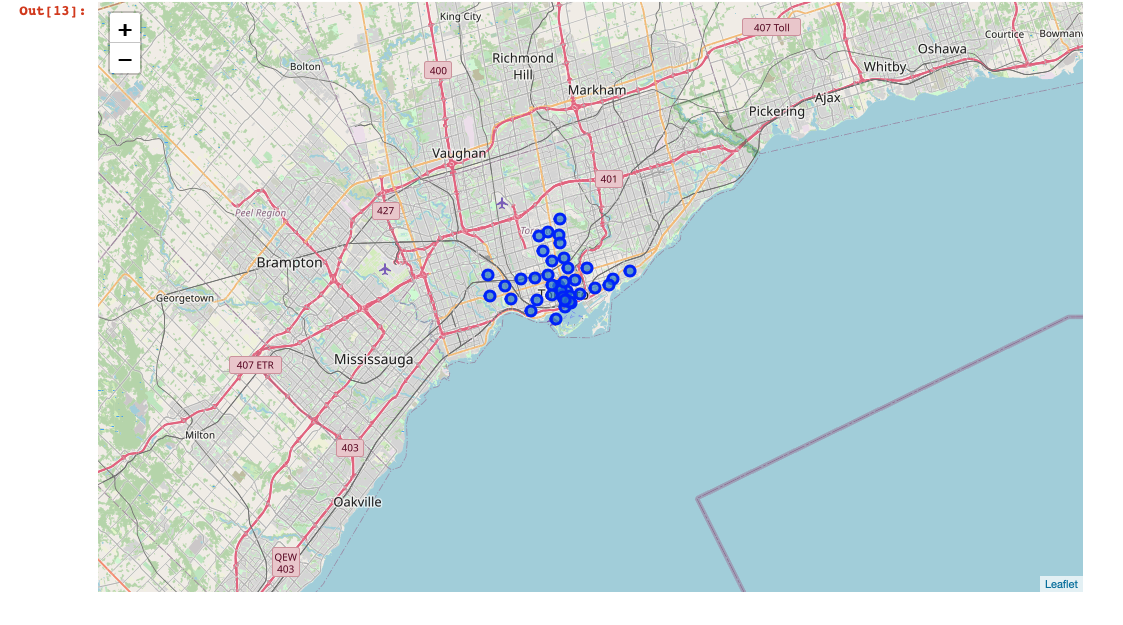

<h3>Using KMeans clustering for the clsutering of the neighbourhoods<h3>

In [19]:
k=5
toronto_clustering = df4.drop(['Postal Code','Borough','Neighbourhood'],1)
kmeans = KMeans(n_clusters = k,random_state=0).fit(toronto_clustering)
kmeans.labels_
df4.insert(0, 'Cluster Labels', kmeans.labels_)

In [20]:
df4

,Cluster Labels,Postal Code,Borough,Neighbourhood,Latitude,Longitude
2,0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,0,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,0,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,0,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,2,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,0,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,0,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,4,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,0,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
31,4,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


In [21]:
# create map
map_clusters = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neighbourhood, cluster in zip(df4['Latitude'], df4['Longitude'], df4['Neighbourhood'], df4['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

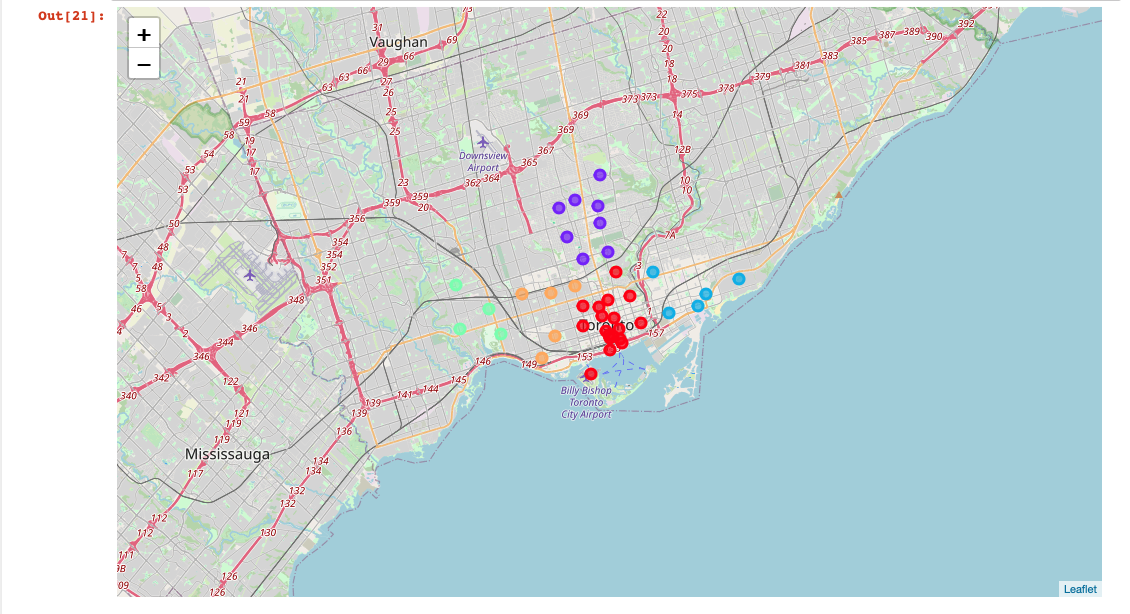